# Erasmus Neural Networks
http://michalbereta.pl/nn
## Widrow-Hoff rule of learning


## Before you start

Exacute the examples.

Then, do the tasks and send back the notebook.

Change the name of this notebook according to the schema: {YourSurname}\_{YourFirstName}\_{OriginalFileName}.

Be sure to fill all places with "YOUR ANSWER HERE".

When ready, send the notebook, with all the necessary files zipped, to the teacher.

### Linear regression

In regression problems, the required output of the model is a numeric value.

In the following example, we generate a data from one dimensional problem, i.e., there is just one input (x axis). The output value is numerical (y axis).

The values of `a` and `b` in 

`y = ax + b` 

are the (unknown to us) parameters of some phenomenon.

Usually, the training data we have is in some way 'noisy' (for example, due to the measurement errors). Nevertheless, we want to estimate the real values of `a` and `b`.

x= [-6.  -5.5 -5.  -4.5 -4.  -3.5 -3.  -2.5 -2.  -1.5 -1.  -0.5  0.   0.5
  1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5]
tr [-4.06629916 -3.74877928 -3.36833872 -3.34484966 -2.87145536 -2.53593175
 -2.56658076 -1.69602575 -2.02711233 -1.34933746 -1.0119889  -0.46255216
  0.02737233 -0.08655187 -0.02796972  0.52001401  0.92221278  1.00410129
  1.20223515  1.53475663  1.67794783  2.50396792  2.68180795  2.68054599]


<IPython.core.display.Javascript object>


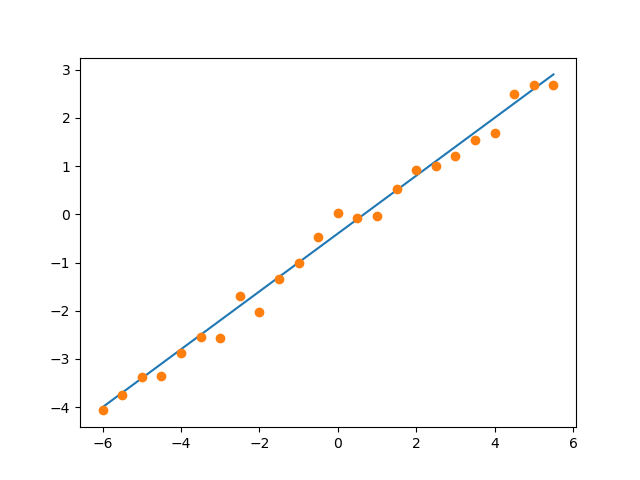

In [84]:
%matplotlib notebook

import numpy as np
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import matplotlib.animation as animation



xmin = -6
xmax = 6
#ymin = -6
#ymax = 6

x = np.arange(xmin, xmax, 0.5)
print ('x=',x)

#real values of unknown process
a = 0.6
b = -0.4
d = a*x + b

#training data with noise (e.g., measurement errors)
sigma = 0.2
tr_d = d + np.random.randn(len(d)) * sigma


print('tr', tr_d)
#plt.xlim(xmin,xmax)
#plt.ylim(ymin,ymax)

plt.plot(x, d)
plt.plot(x, tr_d, 'o')

plt.show()

### Linear regression - estimating parameters of a linear model in one step with MSE minimization

In the following example, the parameters `a` and `b` are estimated in one step. 

There is no iterative learning here!

x= [-6.  -5.5 -5.  -4.5 -4.  -3.5 -3.  -2.5 -2.  -1.5 -1.  -0.5  0.   0.5
  1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5]


<IPython.core.display.Javascript object>


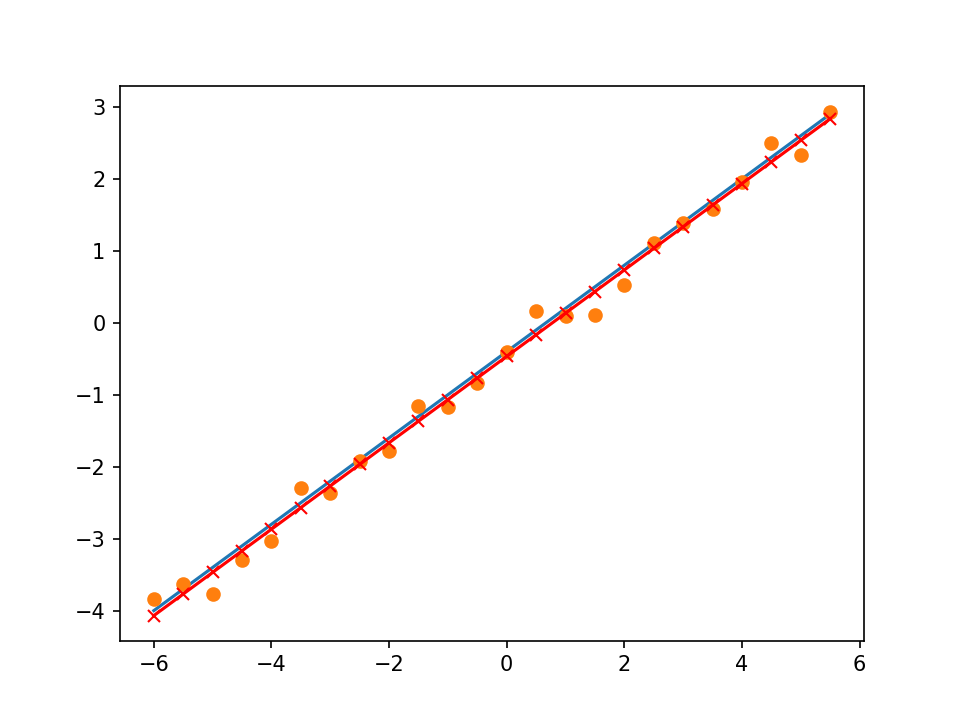

X= [[-6.   1. ]
 [-5.5  1. ]
 [-5.   1. ]
 [-4.5  1. ]
 [-4.   1. ]
 [-3.5  1. ]
 [-3.   1. ]
 [-2.5  1. ]
 [-2.   1. ]
 [-1.5  1. ]
 [-1.   1. ]
 [-0.5  1. ]
 [ 0.   1. ]
 [ 0.5  1. ]
 [ 1.   1. ]
 [ 1.5  1. ]
 [ 2.   1. ]
 [ 2.5  1. ]
 [ 3.   1. ]
 [ 3.5  1. ]
 [ 4.   1. ]
 [ 4.5  1. ]
 [ 5.   1. ]
 [ 5.5  1. ]]
(24, 2)
w= [ 0.60040054 -0.4664815 ]
training mse =  0.7548251467892724
testing mse =  0.17718822059771858


<IPython.core.display.Javascript object>


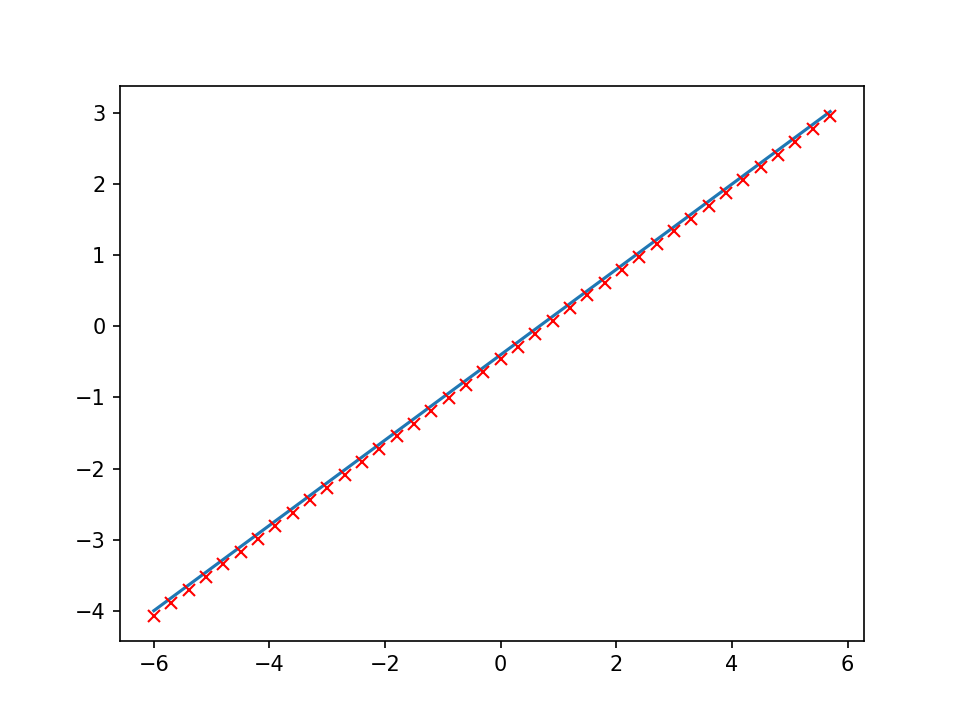

In [2]:
import numpy as np
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import matplotlib.animation as animation

%matplotlib notebook

xmin = -6
xmax = 6
#ymin = -6
#ymax = 6

x = np.arange(xmin, xmax, 0.5)
print ('x=',x)

#real values of unknown process
a = 0.6
b = -0.4
d = a*x + b

#training data with noise (e.g., measurement errors)
sigma = 0.2
tr_d = d + np.random.randn(len(d)) * sigma

#plt.xlim(xmin,xmax)
#plt.ylim(ymin,ymax)

plt.plot(x, d)
plt.plot(x, tr_d, 'o')

#we add the column with "1" values directly here - not efficient in general
X = np.vstack((x, np.ones(len(tr_d)))).T
print('X=',X)
print(X.shape)

#weights for the neuron - there is no iterative process here!
w = np.dot(np.dot( np.linalg.inv( np.dot(X.T, X) ), X.T), tr_d)
print('w=', w)

#neuron responses
y = w[0]*x + w[1]
plt.plot(x, y, 'r')
plt.plot(x, y, 'rx')

#training error
tr_mse = np.dot((y - tr_d).T, (y - tr_d))
print('training mse = ', tr_mse)

#sample some new points as test data
x_test = np.arange(xmin, xmax, 0.3)
d_test = a*x_test + b
y_test = w[0]*x_test + w[1]
test_mse = np.dot((y_test - d_test).T, (y_test - d_test))
print('testing mse = ', test_mse)

plt.figure()
plt.plot(x_test, d_test)
plt.plot(x_test, y_test,'rx')

plt.show()

### Perceptron training with Widrow-Hoff rule (online version) for classification problems (two classes)

In the following example we optimize the perceptron weights with Widrow-Hoff rule. MSE is minimized during the process.

The two classes are ancode numerically as `1` and `-1`.

#### DO NOT USE THIS CODE AS A TEMPLATE FOR YOUR IMPLEMENTATIONS!

w= [ 0.15830694  0.22205716 -0.64818771]


<IPython.core.display.Javascript object>


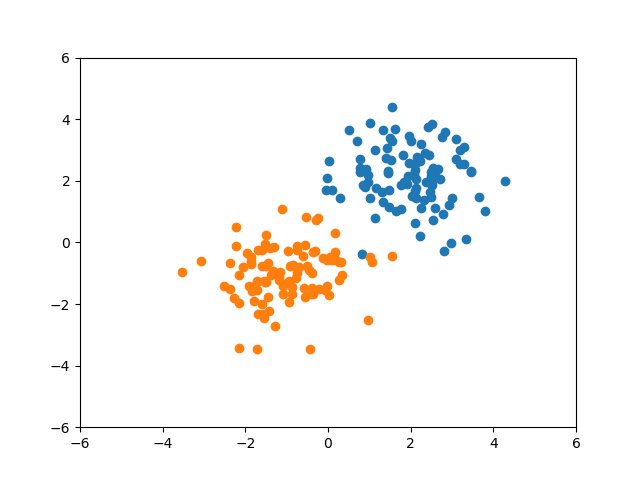

(200, 2)
(2,)
(3,)
end


In [2]:
import numpy as np
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import matplotlib.animation as animation

%matplotlib notebook

#example data from two classes, normal distributions
num = 100
x2 = np.random.multivariate_normal([-1,-1], np.array([[1,0],[0,1]]),num)
x1 = np.random.multivariate_normal([2,2], np.array([[1,0],[0,1]]),num)
xall = np.vstack((x1,x2))
labels = np.ones(num*2)
labels[num:] = -1.0

xmin = -6
xmax = 6
ymin = -6
ymax = 6

#weights initialization - random, small values, both positive and negative
#bias signal is connected with w[0]
w = 2*np.random.rand(3) - 1
#w = np.zeros(3) #try it: not recommended in general
print ('w=',w)


delta = 0.01 #grid accuracy for visualization
x = np.arange(xmin, xmax, delta)
y = np.arange(ymin, ymax, delta)
X, Y = np.meshgrid(x, y)
Z = X*w[1] + Y*w[2] + w[0]

fig = plt.figure()

plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)
plt.plot(x1[:,0],x1[:,1],'o')
plt.plot(x2[:,0],x2[:,1],'o')

print (xall.shape)
print (w[1:].shape)
print (w.shape)
#one iteration of learning algorithm
def update(i):
    global w
    print()
    print ('iteration=',i)

    #neuron resposnses for examples from both classes
    #we assume they should be 1 or -1 depending on te class
    ans = np.dot(xall, w[1:]) + w[0]  
    
    print("ans= ", ans)
    #mean squared error
    mse = np.sqrt(((ans - labels) * (ans - labels)).sum())
    print ('mse=',mse)

    errors = (ans[0:num] <= 0).sum() + (ans[num:] > 0).sum()
    print ('errors=',errors)
    
    #learning rate
    eta = 0.001
    #online learning
    #weights modification
    for k in range(num*2):
        w[1] += eta*(labels[k] - ans[k])*xall[k,0]
        w[2] += eta*(labels[k] - ans[k])*xall[k,1]
        w[0] += eta*(labels[k] - ans[k])*1.0  #bias weight modification        
        #weights vector normalization
        #try it, it seems to be a bad idea here
#        w = w/np.linalg.norm(w) 
    print ('w=',w)
    #vizualization
    plt.clf()
    plt.plot(x1[:,0],x1[:,1],'o')
    plt.plot(x2[:,0],x2[:,1],'o')
    Z = X*w[1] + Y*w[2] + w[0]
    Z[Z>0] = 1
    Z[Z<=0] = -1
    im = plt.imshow(Z, interpolation='bilinear', cmap=cm.hot,
                origin='lower', extent=[xmin, xmax, ymin, ymax],
                vmax=abs(Z).max(), vmin=-abs(Z).max())

    
#start of the algoirthm
ani = animation.FuncAnimation(fig, update, interval=1000, blit=False)
plt.show()

print ('end')


### Task 1

Prepare your own implementation of perceptron learning using Widrow-Hoff algorithm (for classification problems with two classes).

– Use the online or batch mode

– Be ready for any number of attributes (inputs to perceptron)

– Use matrix / vector notation from numpy, avoid unnecessary looping.


In [4]:
import numpy as np

class Perceptron:
    def __init__(self, dim, learningrate=0.001, bias=1):
        self.weights=2*np.random.rand(dim+1) - 1 
        self.weights[0]=bias
        self.learningrate = learningrate

    def predict(self, inputs):
        return np.where(self.activation(inputs) >= 0.0, 1, -1)
    
    def activation(self, inputs):
        return np.dot(inputs, self.weights[1:]) + self.weights[0] 
    
    def learn(self, inputs, labels):
    
        epoch=0
        errors=1
        
        while errors!=0:
            
            errors=0
            print("Epoch "+str(epoch)+"\n")
           
            ans=self.predict(inputs)
            errors=np.count_nonzero(labels-ans)
                
            for i, input in enumerate(inputs):
                
                update = self.learningrate*(labels[i] - ans[i])
                self.weights[1:] += update*input
                self.weights[0] += update        
          
            print(self.weights, "errors=", errors)
            epoch+=1
            
    def __str__(self):
        return '(' + str(self.weights)  + ')'
    def __repr__(self):
        return '(' + str(self.weights) + ')'

p1=Perceptron(4)
p1 
tab=np.array([[8,7,9,6], [7,7,7,6], [6,7,6,6]])
tab2=np.array([1,-1,-1])
p1.learn(tab, tab2)


Epoch 0

[ 0.996       0.54408745 -0.81250016 -0.06358632  0.76825458] errors= 2
Epoch 1

[ 0.992       0.51808745 -0.84050016 -0.08958632  0.74425458] errors= 2
Epoch 2

[ 0.988       0.49208745 -0.86850016 -0.11558632  0.72025458] errors= 2
Epoch 3

[ 0.984       0.46608745 -0.89650016 -0.14158632  0.69625458] errors= 2
Epoch 4

[ 0.98        0.44008745 -0.92450016 -0.16758632  0.67225458] errors= 2
Epoch 5

[ 0.976       0.41408745 -0.95250016 -0.19358632  0.64825458] errors= 2
Epoch 6

[ 0.978       0.43008745 -0.93850016 -0.17558632  0.66025458] errors= 1
Epoch 7

[ 0.976       0.41608745 -0.95250016 -0.18958632  0.64825458] errors= 1
Epoch 8

[ 0.978       0.43208745 -0.93850016 -0.17158632  0.66025458] errors= 1
Epoch 9

[ 0.976       0.41808745 -0.95250016 -0.18558632  0.64825458] errors= 1
Epoch 10

[ 0.978       0.43408745 -0.93850016 -0.16758632  0.66025458] errors= 1
Epoch 11

[ 0.976       0.42008745 -0.95250016 -0.18158632  0.64825458] errors= 1
Epoch 12

[ 0.978       0.

### Task 2

Use the 5D data to train your perceptron based on examples from data5D_train.csv. Last column is the class label.

Generate answers (as 1 or -1) for data in data5D_test.csv and save them to a file.

As the output of the model is numerical, the final classification decision is as follow: for the neuron output signal >0 classify the input to the first class (lable 1), otherwise to the second (label -1).

In [25]:
f = open('data5D_train.csv','r')
lines = f.readlines()

temp=np.loadtxt(lines , dtype="float")
labels=np.concatenate(np.array(temp)[:,len(temp[0])-1:])
values=np.array(temp)[:,:len(temp[0])-1]

f.close()


In [23]:
p2=Perceptron(len(values[0]), 0.001,1)          
p2.learn(values, labels)

Epoch 0

[ 0.652       0.87166841  0.59268765 -0.87794076 -0.39241121 -0.5522754 ] errors= 268
Epoch 1

[ 0.366       0.79776062  0.52051568 -0.74262512 -0.52738805 -0.34346891] errors= 259
Epoch 2

[ 0.156       0.7006836   0.44324011 -0.60323729 -0.63037552 -0.14659473] errors= 231
Epoch 3

[ 0.04        0.59037898  0.36537985 -0.47418501 -0.69024659  0.02431482] errors= 192
Epoch 4

[-0.032       0.49502298  0.27844385 -0.36545792 -0.71407816  0.16203847] errors= 154
Epoch 5

[-0.06        0.41179402  0.19747994 -0.2841498  -0.71618134  0.25682219] errors= 112
Epoch 6

[-0.074       0.34419283  0.12815131 -0.21288286 -0.70802183  0.32765062] errors= 89
Epoch 7

[-0.102       0.28304673  0.07305962 -0.15396778 -0.69440295  0.38188055] errors= 74
Epoch 8

[-0.104       0.23423041  0.0246942  -0.10371124 -0.68395564  0.41963645] errors= 59
Epoch 9

[-0.116       0.19336438 -0.01409211 -0.0639629  -0.67294659  0.44531798] errors= 48
Epoch 10

[-0.112       0.1602343  -0.04598417 -0.0324

In [22]:
f = open('data5D_test.csv','r')
lines = f.readlines()
tests=np.loadtxt(lines , dtype="float")
print(tests)

f.close()

[[-0.21072208 -0.79501808  0.28437907  0.86837059  0.73060236]
 [-0.12111626  0.60824274 -0.47358205  0.69620996  0.21952921]
 [-0.23219499 -0.62105231  0.05503385  0.48291495  0.8759104 ]
 ...
 [-0.28960944 -0.15619135  0.90507601  0.59775244 -0.09617161]
 [ 0.67907071  0.00613763  0.47191729  0.65510653  0.4179075 ]
 [ 0.03854587  0.86104938  0.23411752 -0.25446469 -0.72048086]]


In [41]:
guess=p2.predict(tests)

for i, item in enumerate(guess):
    print("The prediction for sample "+str(i)+" is "+str(item))
    
f = open('result2.txt','w')
for x in guess:
    print(x, file=f)
f.close()

The prediction for sample 0 is -1
The prediction for sample 1 is -1
The prediction for sample 2 is 1
The prediction for sample 3 is -1
The prediction for sample 4 is -1
The prediction for sample 5 is 1
The prediction for sample 6 is 1
The prediction for sample 7 is -1
The prediction for sample 8 is -1
The prediction for sample 9 is -1
The prediction for sample 10 is -1
The prediction for sample 11 is -1
The prediction for sample 12 is 1
The prediction for sample 13 is 1
The prediction for sample 14 is -1
The prediction for sample 15 is -1
The prediction for sample 16 is -1
The prediction for sample 17 is 1
The prediction for sample 18 is 1
The prediction for sample 19 is 1
The prediction for sample 20 is -1
The prediction for sample 21 is 1
The prediction for sample 22 is 1
The prediction for sample 23 is 1
The prediction for sample 24 is -1
The prediction for sample 25 is 1
The prediction for sample 26 is 1
The prediction for sample 27 is 1
The prediction for sample 28 is -1
The predi

### Task 3

Implement Widrow-Hoff online training (update of weights is done after each training example) for linear regression problem. Use the previous example as the starting point.



<b>Multiple linear regression (online) :</b>

In [32]:
weights=2*np.random.rand(len(values[0])) - 1 

def predict(inputs, weights, bias):
    return np.dot(inputs, weights) + bias
    
def cost_function(inputs, labels, weights, bias):
    y=predict(inputs, weights, bias)
    return np.dot((y - labels).T, (y - labels)) # mse

def update_weights(examples, labels, weight, bias, learning_rate):
    
    dw=0
    db=0 
    
    for i in range(len(examples)):
        # Gradient : -2x(y - (mx + b))
        dw += -2*examples[i] * (labels[i] - (weight*examples[i] + bias))
        db += -2*(labels[i] - (weight.dot(examples[i]) + bias))

    weight -= (dw / len(examples)) * learning_rate
    bias -= (db / len(examples)) * learning_rate

    return weight, bias 

def train(examples, labels, weight, bias, learning_rate, epoch):

    for i in range(epoch):
        weight,bias = update_weights(examples, labels, weight, bias, learning_rate)
        cost = cost_function(examples, labels, weight, bias)
        print("cost", cost)

    return weight, bias

train(values, labels, weights, 1, 0.1, 100)


cost 1233.9808287447913
cost 1010.641714347574
cost 844.9956249344259
cost 719.2508999610302
cost 621.6448399458903
cost 544.3159877671238
cost 481.93933069621966
cost 430.8492335107127
cost 388.4743943386005
cost 352.97260447696715
cost 322.99361674296523
cost 297.5242949685429
cost 275.78673302849535
cost 257.17057901747864
cost 241.1875379975313
cost 227.4403328959291
cost 215.6011568582918
cost 205.3964127507581
cost 196.59566466754842
cost 189.00345081849008
cost 182.45307297130398
cost 176.80177788350272
cost 171.92694039163084
cost 167.7229840566744
cost 164.09885780215413
cost 160.97594137591025
cost 158.2862886746999
cost 155.9711423758177
cost 153.97967002131142
cost 152.2678833364738
cost 150.7977108385157
cost 149.53619980774457
cost 148.45482817161638
cost 147.5289102637069
cost 146.73708307738167
cost 146.06086174684265
cost 145.48425469817425
cost 144.99343031787652
cost 144.57642815497354
cost 144.22290865454858
cost 143.9239362518079
cost 143.67179136384556
cost 143.45

(array([ 0.11794535, -0.19816456,  0.14724595, -1.18139729,  0.8127008 ]),
 -0.16365955633465376)

In [28]:
import numpy as np 
import matplotlib.pyplot as plt
plt.figure(figsize=(9, 3))

x=np.array(values)[:,0]
X = np.vstack((x, np.ones(len(values)))).T
print('X=',X)
print(X.shape)

a = 0.6
b = -0.4
d = a*X + b

tr_d=d

w = np.dot(np.dot( np.linalg.inv( np.dot(X.T, X) ), X.T), d)
print('w=', w)

y = w[0]*X + w[1]
plt.plot(X, y, 'r')
plt.plot(X, y, 'rx')

tr_mse = np.dot((y - tr_d).T, (y - tr_d))
print('training mse = ', tr_mse)

x_t = np.array(tests)[:,0]
x_test = np.vstack((x_t, np.ones(len(tests)))).T
d_test = a*x_test + b

print("test", x_test.shape)
y_test = w[0]*x_test + w[1]
test_mse = np.dot((y_test - d_test).T, (y_test - d_test))
print('testing mse = ', test_mse)


plt.plot(X, d) # (x_test, d_test)
plt.plot(x_test, y_test,'--', color='blue')

plt.show()


X= [[-0.45219426  1.        ]
 [-0.72172939  1.        ]
 [-0.04764479  1.        ]
 [ 0.71859074  1.        ]
 [ 0.64350499  1.        ]
 [-0.64359573  1.        ]
 [ 0.50235318  1.        ]
 [-0.36905117  1.        ]
 [-0.95085337  1.        ]
 [-0.34266327  1.        ]
 [ 0.23419711  1.        ]
 [-0.98283687  1.        ]
 [-0.29067109  1.        ]
 [-0.65682617  1.        ]
 [-0.91592373  1.        ]
 [ 0.01615871  1.        ]
 [-0.53843986  1.        ]
 [-0.02700436  1.        ]
 [-0.41901335  1.        ]
 [ 0.06459197  1.        ]
 [-0.56859885  1.        ]
 [-0.0963606   1.        ]
 [-0.39671738  1.        ]
 [ 0.86881198  1.        ]
 [ 0.03456216  1.        ]
 [-0.97101837  1.        ]
 [-0.51820564  1.        ]
 [ 0.58371916  1.        ]
 [ 0.73131557  1.        ]
 [ 0.02587461  1.        ]
 [ 0.71615077  1.        ]
 [ 0.36358253  1.        ]
 [ 0.28434712  1.        ]
 [-0.39108581  1.        ]
 [-0.1660747   1.        ]
 [ 0.7021253   1.        ]
 [-0.47541482  1.        

<Figure size 900x300 with 1 Axes>